# Imports

In [1]:
import os
import math
import cv2
import pytesseract
import numpy as np
import matplotlib.pyplot as plt

# Load Image

In [331]:
image_number = 1

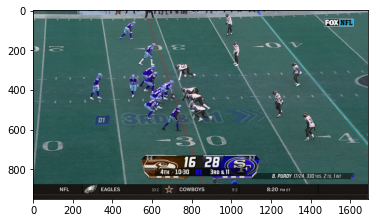

In [332]:
# load image as gray scale
img = cv2.imread(f"./pre_snap_images/test-data/{image_number}.png")
plt.imshow(img)

# Apply Grayscale

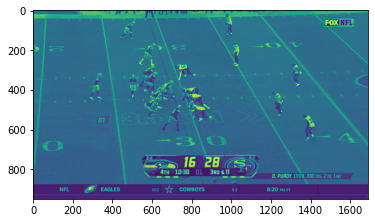

In [333]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)

# Mask Score Bar

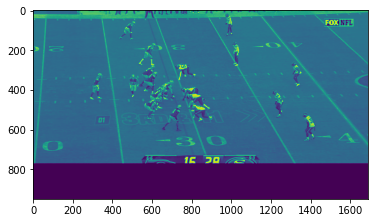

In [334]:
# masking score bar
mask_height = int(gray.shape[0] * 0.81)
mask = np.zeros(gray.shape, dtype=np.uint8)
cv2.rectangle(mask, (0, 0), (gray.shape[1], mask_height), (255), thickness=-1)

# Apply the mask to the grayscale image
masked_gray = cv2.bitwise_and(gray, mask)
plt.imshow(masked_gray)

# Apply Gaussian Blur

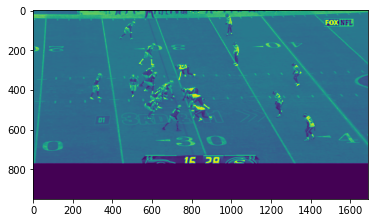

In [335]:
# Apply Gaussian blur
blurred = cv2.GaussianBlur(masked_gray, (5, 5), 0)
plt.imshow(blurred)

# Detect Edges

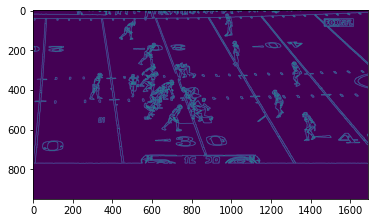

In [336]:
# Edge detection
edged = cv2.Canny(blurred, 30, 150)
plt.imshow(edged)

# Find Contours and Filter them

In [337]:
# Find contours
contours, _ = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [338]:
def get_coord_function(x, y, w, h, buffer, img_h, img_w):
    x_0 = x
    if x_0 - buffer >= 0:
        x_0 -= buffer
        
    y_0 = y
    if y_0 - buffer >= 0:
        y_0 -= buffer
       
    x_1 = x + w
    if x_1 + buffer <= img_w:
        x_1 += buffer
        
    y_1 = y + h
    if y_1 + buffer <= img_h:
        y_1 += buffer

    return x_0, y_0, x_1, y_1

In [339]:
rm ./line_number_recognition/digit-*

In [340]:
# store contours
digits = list()

# for more pixel info on image
buffer = 10

# for height threshold
img_h, img_w = edged.shape
max_height_threshold = img_h / 2.8
min_height_threshold = img_h / 9

print("h", " w", " i", "  j")

# Loop over the contours
for i, c in enumerate(contours):
    # Compute the bounding box for the contour then extract the digits
    (x, y, w, h) = cv2.boundingRect(c)
    if 110 >= h >= 10 and 130 >= w >= 30 and max_height_threshold >= y >= min_height_threshold :  # Filter based on typical number size and position
        x_0, y_0, x_1, y_1 = get_coord_function(x, y, w, h, buffer, img_h, img_w)

        digit = gray[y_0:y_1, x_0:x_1]
        digits.append(digit)

        print(h, w, i, len(digits) - 1)
        
        if digit is not None and not digit.size == 0:
#             cv2.imwrite(f"./line_number_recognition/digit-{i}.jpg", digit)
            cv2.imwrite(f"./line_number_recognition/digit-{i}.jpg", cv2.resize(digit, (120, 120)))

print()
print(f"Max h thres: {max_height_threshold}")
print(f"Min h thres: {min_height_threshold}")
print(f"Length of candidate digits detected: {len(digits)}")

h  w  i   j
53 31 228 0
43 35 231 1
60 51 235 2
71 68 244 3
66 34 247 4
44 54 264 5
79 83 269 6
57 44 273 7
35 52 286 8
50 36 288 9
75 71 299 10
13 64 304 11
28 76 307 12
29 32 310 13
22 35 313 14
14 72 315 15
99 30 316 16
86 56 320 17
53 76 321 18
28 80 322 19
28 75 323 20
11 33 331 21

Max h thres: 339.28571428571433
Min h thres: 105.55555555555556
Length of candidate digits detected: 22


# Parse Number from Image

In [311]:
digit_selection = 8

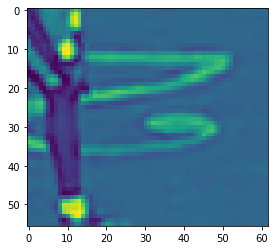

In [312]:
plt.imshow(digits[digit_selection])

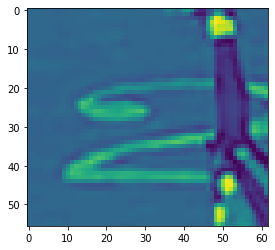

In [313]:
flipped_image = cv2.flip(digits[digit_selection], -1)
plt.imshow(flipped_image)

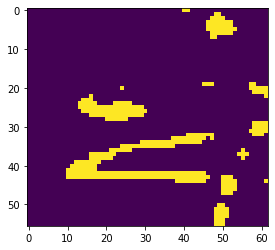

In [317]:
_, thresholded_image = cv2.threshold(flipped_image, 128, 255, cv2.THRESH_BINARY)
plt.imshow(thresholded_image)

In [318]:
image = 2
resized_image = cv2.resize(thresholded_image, (120, 120))

In [319]:
directory_path = f"./line_number_samples/{image}"

# List all files in the directory
files = [file for file in os.listdir(directory_path) if os.path.isfile(os.path.join(directory_path, file))]

# Count the number of files
count = len(files)

In [320]:
file_path = f"{directory_path}/{count}.jpg"

if os.path.exists(file_path):
    print(f"File path exists!")
    raise 
else:
    cv2.imwrite(file_path, resized_image)